In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gen_signal import build_empty_signal, gauss_sig
from gen_noise_spectrum import generate_time_from_psd, f2
from gen_toy_dataset import build_toy_dataset

(1024,)


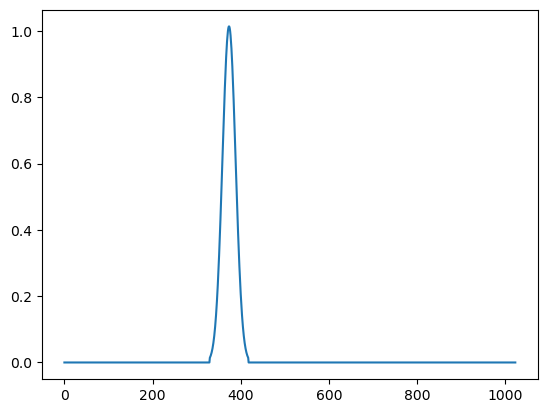

In [10]:
sr = 2**5
n = 2**10

std_min = 10    
std_max = 30
amp_min = 1
amp_max = 5
num_pulses = 1
std_length = 3

x, t = build_empty_signal(n, sr)
sig = gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length)
print(x.shape)
plt.plot(sig)

In [15]:
# generate psd, assuming some binning(anything)
largest_frequency = 100
num_bins = 700
freqs = np.linspace(0, largest_frequency, num_bins)

# generate spikes of noise
num_spikes = 10
psd = np.zeros(num_bins)

psd, freq_spectrum, time_signal = generate_time_from_psd(n, sr, largest_frequency, num_bins, f2, {"num_spikes":10})
print(time_signal.shape)

(1398,)


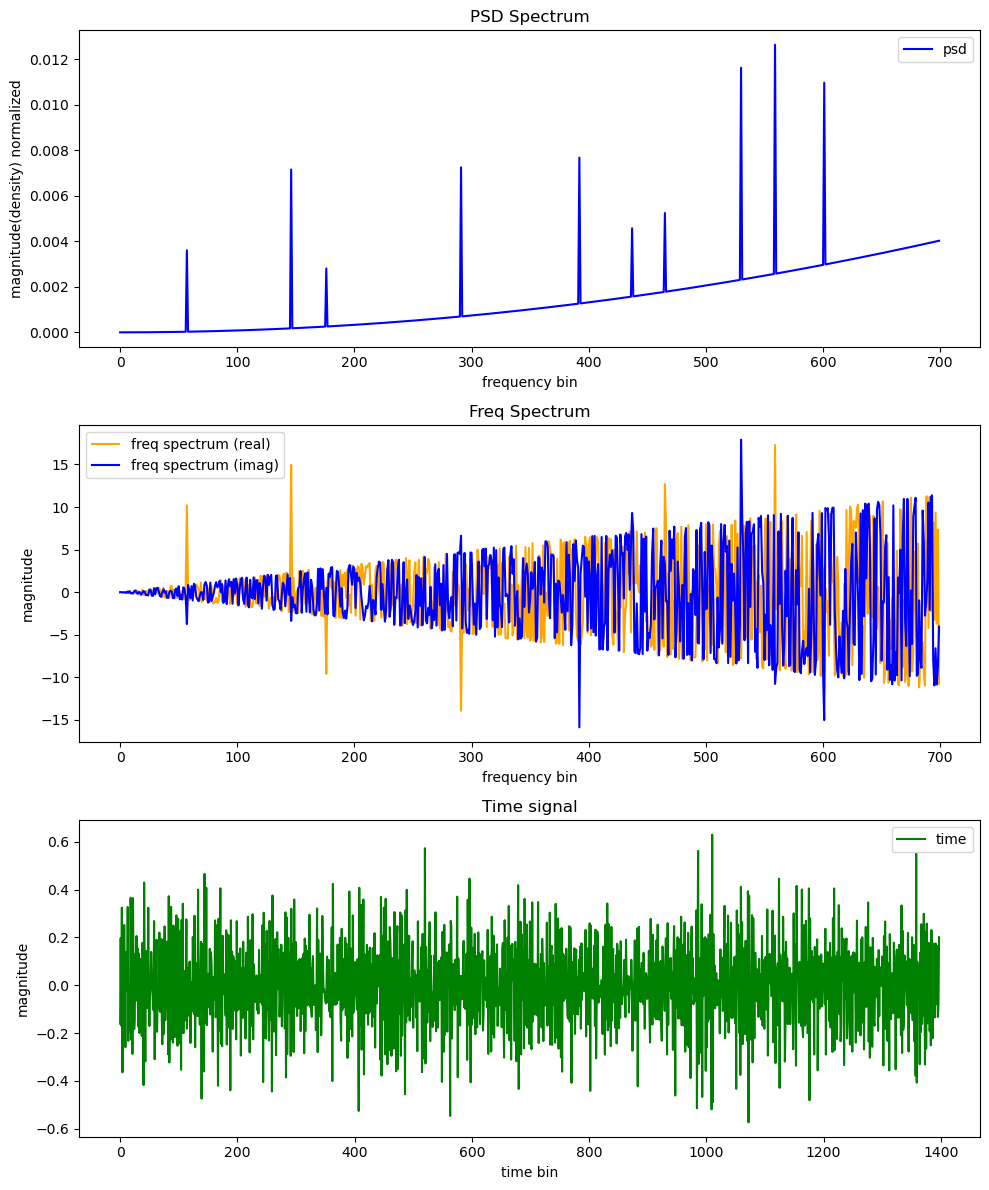

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot each dataset on its own axis
ax1.plot(psd, color="blue", label="psd")
ax1.set_xlabel("frequency bin")
ax1.set_ylabel("magnitude(density) normalized")
ax1.set_title("PSD Spectrum")
ax1.legend()

ax2.plot(np.real(freq_spectrum), color="orange", label="freq spectrum (real)")
ax2.plot(np.imag(freq_spectrum), color="blue", label="freq spectrum (imag)")
ax2.set_title("Freq Spectrum")
ax2.set_xlabel("frequency bin")
ax2.set_ylabel("magnitude")
ax2.legend()

# To avoid very large values, restrict the y-axis range for the tangent plot
ax3.plot(time_signal, color="green", label="time")
ax3.set_title("Time signal")
ax3.set_ylabel("magnitude")
ax3.set_xlabel("time bin")
ax3.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [2]:
train_loader, test_loader = build_toy_dataset()

/home/mezhang/SpaceStateModelStudy/data/gen_toy_dataset.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  X, Y = torch.tensor(X), torch.tensor(Y)


Text(0.5, 0, 'time')

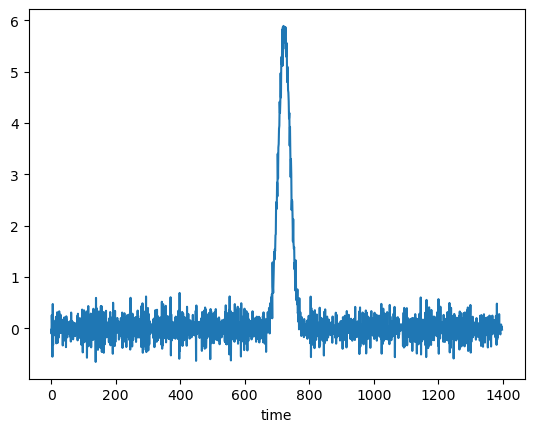

In [3]:
batch = next(iter(train_loader))
plt.plot(batch[0][0].numpy())
plt.xlabel("time")
#plt.plot(batch[1][0].numpy())